In [1]:
import pandas as pd
import seaborn as sns

In [2]:
## Import and read the first five records of dataset
data=pd.read_csv("fake_news_dataset.csv")
data.head()

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake


In [3]:
## check the  data types of each columns of dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     20000 non-null  object
 1   text      20000 non-null  object
 2   date      20000 non-null  object
 3   source    19000 non-null  object
 4   author    19000 non-null  object
 5   category  20000 non-null  object
 6   label     20000 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [5]:
## Get the number of  rows in the dataset

In [6]:
data.count()

title       20000
text        20000
date        20000
source      19000
author      19000
category    20000
label       20000
dtype: int64

In [7]:
## Check  the null values are their or not

In [8]:
data.isnull().sum()

title          0
text           0
date           0
source      1000
author      1000
category       0
label          0
dtype: int64

In [9]:
##  check the duplicate values

In [10]:
data.duplicated().sum()

0

In [11]:
## Split the whole dataset into train and test set

In [12]:
from sklearn.model_selection import train_test_split

train_set,test_set=train_test_split(data, test_size=0.2, random_state=42)

In [13]:
print(train_set.shape,test_set.shape)

(16000, 7) (4000, 7)


## Explotary Data Analysis  (EDA)

In [14]:
## check the null values of train_set

In [15]:
train_set.isnull().sum()

title         0
text          0
date          0
source      782
author      811
category      0
label         0
dtype: int64

In [16]:
## check the duplicate values of  train_set

In [17]:
train_set.duplicated().sum()

0

In [18]:
## check the value counts of  source and  author solumns

In [19]:
train_set['source'].value_counts()

source
Daily News      1970
The Guardian    1930
BBC             1913
CNN             1898
Fox News        1890
Reuters         1886
NY Times        1874
Global Times    1857
Name: count, dtype: int64

In [20]:
train_set['author'].value_counts()

author
Michael Smith            10
John Smith                9
Christopher Johnson       7
Jennifer Davis            7
John Brown                6
                         ..
Wendy Mccullough          1
Jonathan Curtis           1
Rodney Young              1
Samantha Gutierrez        1
Mr. Ernest Harris Jr.     1
Name: count, Length: 13847, dtype: int64

In [21]:
## fill the null values

In [22]:
train_set['source'].fillna('Global Times', inplace=True)

C:\Users\THIS PC\AppData\Local\Temp\ipykernel_34456\3912575003.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_set['source'].fillna('Global Times', inplace=True)


In [23]:
train_set.isnull().sum()

title         0
text          0
date          0
source        0
author      811
category      0
label         0
dtype: int64

In [24]:
train_set['author'].fillna('Wendy Mccullough', inplace=True)

C:\Users\THIS PC\AppData\Local\Temp\ipykernel_34456\546374671.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_set['author'].fillna('Wendy Mccullough', inplace=True)


In [25]:
train_set.isnull().sum()

title       0
text        0
date        0
source      0
author      0
category    0
label       0
dtype: int64

In [26]:
train_set.isnull().sum()

title       0
text        0
date        0
source      0
author      0
category    0
label       0
dtype: int64

In [27]:
## check the duplicate values again

In [28]:
train_set.duplicated().sum()

0

## Explotary Data Analysis (EDA)

#### Text Preprocessing

In [29]:
train_set.head()

,title,text,date,source,author,category,label
5894,Age important scientist question why onto acti...,image morning whether thought seven office kit...,2022-05-30,NY Times,Kimberly Martinez,Politics,real
3728,Trial candidate travel pretty agreement attack...,recent item success plant dark however however...,2024-10-20,BBC,Mr. Daniel Bailey DDS,Sports,real
8958,Animal painting interest I society air east to...,yourself religious point hour Mrs cover case s...,2024-08-25,NY Times,Kimberly Wagner,Politics,fake
7671,Improve surface face today fact.,road listen add question main head worker gene...,2023-10-07,CNN,Charlene Harrington,Entertainment,fake
5999,Family pressure common behavior.,low indicate education support brother suffer ...,2025-03-17,Fox News,Robert Gardner,Politics,real


In [30]:
#train_set['source'].value_counts()

In [31]:
#train_set['category'].value_counts()

In [32]:
#train_set['category'].head(100)

In [33]:
#train_set.replace({'source':{'Daily News':0,'The Guardian':1,'BBC':3,'CNN':4,'Fox News':5,'Reuters':6,'NY Times':7,'Global Times':8}}, inplace=True)
#train_set.replace({'cateogry':{'Health':1,'Entertainment':2,'Technology':3,'Business':4,'Sports':5,'Science':6,'Politics':7}},inplace=True)
#train_set.head()

In [34]:
import re
import string

In [35]:
train_set['text'].head()

5894    image morning whether thought seven office kit...
3728    recent item success plant dark however however...
8958    yourself religious point hour Mrs cover case s...
7671    road listen add question main head worker gene...
5999    low indicate education support brother suffer ...
Name: text, dtype: object

In [36]:
## Convert uppercase into lowercase

In [37]:
train_set['text']=train_set['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [38]:
train_set['text']

5894     image morning whether thought seven office kit...
3728     recent item success plant dark however however...
8958     yourself religious point hour mrs cover case s...
7671     road listen add question main head worker gene...
5999     low indicate education support brother suffer ...
                               ...                        
11284    middle form imagine item company good town for...
11964    collection short section yourself involve real...
5390     card compare magazine education evening energy...
860      fire ask lose institution field candidate age ...
15795    book easy morning report kind better start fig...
Name: text, Length: 16000, dtype: object

In [39]:
train_set['author']=train_set['author'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [40]:
train_set['author']

5894         kimberly martinez
3728     mr. daniel bailey dds
8958           kimberly wagner
7671       charlene harrington
5999            robert gardner
                 ...          
11284              cathy woods
11964      nicholas williamson
5390               david mcgee
860           stephanie austin
15795    mr. ernest harris jr.
Name: author, Length: 16000, dtype: object

In [41]:
train_set['title']=train_set['title'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [42]:
train_set['title']

5894     age important scientist question why onto acti...
3728     trial candidate travel pretty agreement attack...
8958     animal painting interest i society air east to...
7671                      improve surface face today fact.
5999                      family pressure common behavior.
                               ...                        
11284               surface address media speak join poor.
11964     short theory live role pressure since point for.
5390                       hope television artist improve.
860           far choice test last generation friend rich.
15795          audience four art section assume a may out.
Name: title, Length: 16000, dtype: object

In [43]:
train_set['author']=train_set['author'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [44]:
train_set['author']

5894         kimberly martinez
3728     mr. daniel bailey dds
8958           kimberly wagner
7671       charlene harrington
5999            robert gardner
                 ...          
11284              cathy woods
11964      nicholas williamson
5390               david mcgee
860           stephanie austin
15795    mr. ernest harris jr.
Name: author, Length: 16000, dtype: object

In [45]:
train_set['source']=train_set['source'].apply(lambda x:" ".join(x.lower() for x in  x.split()))

In [46]:
train_set['source']

5894       ny times
3728            bbc
8958       ny times
7671            cnn
5999       fox news
            ...    
11284      fox news
11964      ny times
5390            bbc
860      daily news
15795      ny times
Name: source, Length: 16000, dtype: object

In [47]:
train_set['category']=train_set['category'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [48]:
train_set['category']

5894          politics
3728            sports
8958          politics
7671     entertainment
5999          politics
             ...      
11284         business
11964         business
5390           science
860            science
15795           sports
Name: category, Length: 16000, dtype: object

In [49]:
train_set.head()

,title,text,date,source,author,category,label
5894,age important scientist question why onto acti...,image morning whether thought seven office kit...,2022-05-30,ny times,kimberly martinez,politics,real
3728,trial candidate travel pretty agreement attack...,recent item success plant dark however however...,2024-10-20,bbc,mr. daniel bailey dds,sports,real
8958,animal painting interest i society air east to...,yourself religious point hour mrs cover case s...,2024-08-25,ny times,kimberly wagner,politics,fake
7671,improve surface face today fact.,road listen add question main head worker gene...,2023-10-07,cnn,charlene harrington,entertainment,fake
5999,family pressure common behavior.,low indicate education support brother suffer ...,2025-03-17,fox news,robert gardner,politics,real


In [50]:
## Remove the links

In [51]:
train_set['title']=train_set['title'].apply(lambda x: " ".join(re.sub(r'https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [52]:
train_set['title']

5894     age important scientist question why onto acti...
3728     trial candidate travel pretty agreement attack...
8958     animal painting interest i society air east to...
7671                      improve surface face today fact.
5999                      family pressure common behavior.
                               ...                        
11284               surface address media speak join poor.
11964     short theory live role pressure since point for.
5390                       hope television artist improve.
860           far choice test last generation friend rich.
15795          audience four art section assume a may out.
Name: title, Length: 16000, dtype: object

In [53]:
train_set['text']=train_set['text'].apply(lambda x: " ".join(re.sub(r'https?\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [54]:
train_set['text']

5894     image morning whether thought seven office kit...
3728     recent item success plant dark however however...
8958     yourself religious point hour mrs cover case s...
7671     road listen add question main head worker gene...
5999     low indicate education support brother suffer ...
                               ...                        
11284    middle form imagine item company good town for...
11964    collection short section yourself involve real...
5390     card compare magazine education evening energy...
860      fire ask lose institution field candidate age ...
15795    book easy morning report kind better start fig...
Name: text, Length: 16000, dtype: object

In [55]:
train_set['source']=train_set['source'].apply(lambda x: " ".join(re.sub(r'https?\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [56]:
train_set['source']

5894       ny times
3728            bbc
8958       ny times
7671            cnn
5999       fox news
            ...    
11284      fox news
11964      ny times
5390            bbc
860      daily news
15795      ny times
Name: source, Length: 16000, dtype: object

In [57]:
train_set['author']=train_set['author'].apply(lambda x:" ".join(re.sub(r'https?\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [58]:
train_set['author']

5894         kimberly martinez
3728     mr. daniel bailey dds
8958           kimberly wagner
7671       charlene harrington
5999            robert gardner
                 ...          
11284              cathy woods
11964      nicholas williamson
5390               david mcgee
860           stephanie austin
15795    mr. ernest harris jr.
Name: author, Length: 16000, dtype: object

In [59]:
train_set['category']=train_set['category'].apply(lambda x: " ".join(re.sub(r'https?\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [60]:
train_set['category']

5894          politics
3728            sports
8958          politics
7671     entertainment
5999          politics
             ...      
11284         business
11964         business
5390           science
860            science
15795           sports
Name: category, Length: 16000, dtype: object

In [61]:
## Remove the puncutations from text

In [62]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [63]:
train_set.head()

,title,text,date,source,author,category,label
5894,age important scientist question why onto acti...,image morning whether thought seven office kit...,2022-05-30,ny times,kimberly martinez,politics,real
3728,trial candidate travel pretty agreement attack...,recent item success plant dark however however...,2024-10-20,bbc,mr. daniel bailey dds,sports,real
8958,animal painting interest i society air east to...,yourself religious point hour mrs cover case s...,2024-08-25,ny times,kimberly wagner,politics,fake
7671,improve surface face today fact.,road listen add question main head worker gene...,2023-10-07,cnn,charlene harrington,entertainment,fake
5999,family pressure common behavior.,low indicate education support brother suffer ...,2025-03-17,fox news,robert gardner,politics,real


In [64]:
def remove_punctuation(text):
    for punctuations in string.punctuation:
        text=text.replace(punctuations,'')
    return text

train_set['title']=train_set['title'].apply(remove_punctuation)
train_set['text']=train_set['text'].apply(remove_punctuation)
train_set['source']=train_set['source'].apply(remove_punctuation)
train_set['author']=train_set['author'].apply(remove_punctuation)
train_set['category']=train_set['category'].apply(remove_punctuation)

In [65]:
train_set['title'].head()

5894    age important scientist question why onto acti...
3728    trial candidate travel pretty agreement attack...
8958    animal painting interest i society air east total
7671                      improve surface face today fact
5999                      family pressure common behavior
Name: title, dtype: object

In [66]:
train_set['text'].head()

5894    image morning whether thought seven office kit...
3728    recent item success plant dark however however...
8958    yourself religious point hour mrs cover case s...
7671    road listen add question main head worker gene...
5999    low indicate education support brother suffer ...
Name: text, dtype: object

In [67]:
train_set['source'].head()

5894    ny times
3728         bbc
8958    ny times
7671         cnn
5999    fox news
Name: source, dtype: object

In [68]:
train_set['author'].head()

5894       kimberly martinez
3728    mr daniel bailey dds
8958         kimberly wagner
7671     charlene harrington
5999          robert gardner
Name: author, dtype: object

In [69]:
train_set['category'].head()

5894         politics
3728           sports
8958         politics
7671    entertainment
5999         politics
Name: category, dtype: object

In [70]:
## Remove the numbers from  text

In [71]:
train_set['title']=train_set['title'].str.replace('\d+','',regex=True)
train_set['text']=train_set['text'].str.replace('\d+','',regex=True)
train_set['source']=train_set['source'].str.replace('\d+','',regex=True)
train_set['author']=train_set['author'].str.replace('\d+','',regex=True)
train_set['category']=train_set['category'].str.replace('\d+','',regex=True)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\THIS PC\AppData\Local\Temp\ipykernel_34456\3529597117.py:1: SyntaxWarning: invalid escape sequence '\d'
  train_set['title']=train_set['title'].str.replace('\d+','',regex=True)
C:\Users\THIS PC\AppData\Local\Temp\ipykernel_34456\3529597117.py:2: SyntaxWarning: invalid escape sequence '\d'
  train_set['text']=train_set['text'].str.replace('\d+','',regex=True)
C:\Users\THIS PC\AppData\Local\Temp\ipykernel_34456\3529597117.py:3: SyntaxWarning: invalid escape sequence '\d'
  train_set['sour

In [72]:
train_set.head()

,title,text,date,source,author,category,label
5894,age important scientist question why onto acti...,image morning whether thought seven office kit...,2022-05-30,ny times,kimberly martinez,politics,real
3728,trial candidate travel pretty agreement attack...,recent item success plant dark however however...,2024-10-20,bbc,mr daniel bailey dds,sports,real
8958,animal painting interest i society air east total,yourself religious point hour mrs cover case s...,2024-08-25,ny times,kimberly wagner,politics,fake
7671,improve surface face today fact,road listen add question main head worker gene...,2023-10-07,cnn,charlene harrington,entertainment,fake
5999,family pressure common behavior,low indicate education support brother suffer ...,2025-03-17,fox news,robert gardner,politics,real


In [73]:
## Remove the stop words

In [74]:
import nltk

In [75]:
nltk.download('stopwords',download_dir='stopwords/')

[nltk_data] Downloading package stopwords to stopwords/...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
with open('stopwords/corpora/stopwords/english', 'r') as file:
    sw=file.read().splitlines()

In [77]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [78]:
train_set['title']=train_set['title'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
train_set['text']=train_set['text'].apply(lambda x:" ".join(x for x in x.split() if x not in sw))
train_set['source']=train_set['source'].apply(lambda x:" ".join(x for x in x.split() if x not in sw))
train_set['author']=train_set['author'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
train_set['category']=train_set['category'].apply(lambda x:" ".join(x for x in x.split() if x not in sw))

In [79]:
train_set.head(20)

,title,text,date,source,author,category,label
5894,age important scientist question onto activity,image morning whether thought seven office kit...,2022-05-30,ny times,kimberly martinez,politics,real
3728,trial candidate travel pretty agreement attack...,recent item success plant dark however however...,2024-10-20,bbc,mr daniel bailey dds,sports,real
8958,animal painting interest society air east total,religious point hour mrs cover case source sea...,2024-08-25,ny times,kimberly wagner,politics,fake
7671,improve surface face today fact,road listen add question main head worker gene...,2023-10-07,cnn,charlene harrington,entertainment,fake
5999,family pressure common behavior,low indicate education support brother suffer ...,2025-03-17,fox news,robert gardner,politics,real
5751,agent degree pass feeling address,almost without trouble resource memory senior ...,2024-03-09,reuters,dawn stewart,entertainment,fake
1688,spend record participant assume fund real,sense phone change low name use appear senior ...,2023-04-02,guardian,daniel mitchell,entertainment,real
6836,maybe cause center sit cut argue,professional boy blood fast treat east method ...,2025-04-18,ny times,samuel gates,technology,fake
6536,maybe result character value,choice lay sometimes article team newspaper ra...,2024-09-03,cnn,frank barajas,sports,fake
4842,eight though bag claim issue,social sister ball pretty thus management rece...,2023-05-13,ny times,kristen mercado,science,fake


In [80]:
## Stemming technique

In [81]:
from nltk.stem import PorterStemmer

ps=PorterStemmer()

In [82]:
train_set['title']=train_set['title'].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))
train_set['text']=train_set['text'].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))
train_set['source']=train_set['source'].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))
train_set['author']=train_set['author'].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))
train_set['category']=train_set['author'].apply(lambda x:" ".join(ps.stem(x) for x in  x.split()))                                           

In [83]:
train_set.head(20)

,title,text,date,source,author,category,label
5894,age import scientist question onto activ,imag morn whether thought seven offic kitchen ...,2022-05-30,ny time,kimberli martinez,kimberli martinez,real
3728,trial candid travel pretti agreement attack me...,recent item success plant dark howev howev pai...,2024-10-20,bbc,mr daniel bailey dd,mr daniel bailey dd,real
8958,anim paint interest societi air east total,religi point hour mr cover case sourc season p...,2024-08-25,ny time,kimberli wagner,kimberli wagner,fake
7671,improv surfac face today fact,road listen add question main head worker gene...,2023-10-07,cnn,charlen harrington,charlen harrington,fake
5999,famili pressur common behavior,low indic educ support brother suffer owner sp...,2025-03-17,fox news,robert gardner,robert gardner,real
5751,agent degre pass feel address,almost without troubl resourc memori senior re...,2024-03-09,reuter,dawn stewart,dawn stewart,fake
1688,spend record particip assum fund real,sens phone chang low name use appear senior re...,2023-04-02,guardian,daniel mitchel,daniel mitchel,real
6836,mayb caus center sit cut argu,profession boy blood fast treat east method si...,2025-04-18,ny time,samuel gate,samuel gate,fake
6536,mayb result charact valu,choic lay sometim articl team newspap rate aro...,2024-09-03,cnn,frank baraja,frank baraja,fake
4842,eight though bag claim issu,social sister ball pretti thu manag recent sub...,2023-05-13,ny time,kristen mercado,kristen mercado,fake


##  Building the  vocabulary

In [84]:
from collections import Counter
vocab=Counter()

In [85]:
vocab

Counter()

In [86]:
train_set_columns_list=['title','text','source','author','category']

for i  in train_set_columns_list:
    vocab.update(train_set[i])

In [87]:
len(vocab)

45901

In [88]:
#token = [key for key in vocab if vocab[key]>8]
#token

In [89]:
#len(token)

In [90]:
def save_vocabulary(lines, filename):
    data="\n".join(lines)
    file=open(filename,'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(vocab, 'vocabulary.txt')

In [91]:
## Seperate the dataset  independent variables and target variable

In [92]:
x=train_set.drop('label', axis=1)
y=train_set['label']

In [93]:
x.head()

,title,text,date,source,author,category
5894,age import scientist question onto activ,imag morn whether thought seven offic kitchen ...,2022-05-30,ny time,kimberli martinez,kimberli martinez
3728,trial candid travel pretti agreement attack me...,recent item success plant dark howev howev pai...,2024-10-20,bbc,mr daniel bailey dd,mr daniel bailey dd
8958,anim paint interest societi air east total,religi point hour mr cover case sourc season p...,2024-08-25,ny time,kimberli wagner,kimberli wagner
7671,improv surfac face today fact,road listen add question main head worker gene...,2023-10-07,cnn,charlen harrington,charlen harrington
5999,famili pressur common behavior,low indic educ support brother suffer owner sp...,2025-03-17,fox news,robert gardner,robert gardner


In [94]:
y.head()

5894    real
3728    real
8958    fake
7671    fake
5999    real
Name: label, dtype: object

In [95]:
## split the independent features into X_train,X_test,y_train,y_test

In [96]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [97]:
X_train.shape

(12800, 6)

In [98]:
y_train.shape

(12800,)

In [99]:
X_test.shape

(3200, 6)

In [100]:
y_test.shape

(3200,)

In [101]:
X_train.head()

,title,text,date,source,author,category
252,hope polic budget station anyon,billion simpli know social ok opportun product...,2024-08-15,ny time,ashley miller,ashley miller
18632,nearli prove none especi,star recogn fill secur movement republican goo...,2024-11-13,ny time,lori hickman,lori hickman
19138,finish charg world group without,want film tend includ dog exist long bad liste...,2022-07-23,cnn,dana jordan,dana jordan
1673,develop defens effect sort attorney requir also,money avail abil size arriv power yet elect ow...,2024-02-06,bbc,erika mcdonald,erika mcdonald
17688,group although,open fire hard away cut societi citi troubl ba...,2024-07-02,ny time,nicol henri,nicol henri


In [102]:
y_train.head()

252      fake
18632    fake
19138    fake
1673     fake
17688    fake
Name: label, dtype: object

In [103]:
X_train.shape

(12800, 6)

In [104]:
y_train.shape

(12800,)

In [105]:
## convert the text into the  numerical values

In [106]:
import numpy as np

def vectorizer(ds, vocabulary):
    vectorizer_list = []
    vocab_set = set(vocabulary)  # Use a set for faster lookup
    
    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary), dtype=np.float32)  # Use np.float16 to reduce memory usage
        sentence_words = set(sentence.split())  # Split and convert sentence to a set to speed up membership checking
        
        for i, word in enumerate(vocabulary):
            if word in sentence_words:  # Check if word exists in the sentence
                sentence_list[i] = 1
                
        vectorizer_list.append(sentence_list)
    
    # Convert the list to a numpy array only once
    vectorizer_list_new = np.asarray(vectorizer_list, dtype=np.float32)
    
    return vectorizer_list_new

In [107]:
# Example: Combine columns into a single sentence per row
X_train = pd.DataFrame(X_train)
X_train.shape

(12800, 6)

In [108]:
ds = X_train.astype(str).agg(' '.join, axis=1).tolist() 
len(ds)

12800

In [109]:
vectorized_x_train=vectorizer(ds,vocab)
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [110]:
vectorized_x_train.shape

(12800, 45901)

In [111]:
ds = X_test.astype(str).agg(' '.join, axis=1).tolist() 
len(ds)

3200

In [112]:
vectorized_x_test=vectorizer(ds,vocab)
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [113]:
vectorized_x_test.shape

(3200, 45901)

In [114]:
## check the valu counts of y_train

In [115]:
y_train.shape

(12800,)

In [116]:
y_train.value_counts()

label
fake    6447
real    6353
Name: count, dtype: int64

C:\Users\THIS PC\AppData\Local\Temp\ipykernel_34456\2474439606.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]), labels=["Fake","Real"])
C:\Users\THIS PC\AppData\Local\Temp\ipykernel_34456\2474439606.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]), labels=["Fake","Real"])


([<matplotlib.patches.Wedge at 0x21fd13378c0>,
 [Text(-0.012688840613844302, 1.0999268127124988, 'Fake'),
  Text(0.012688840613844165, -1.0999268127124988, 'Real')])

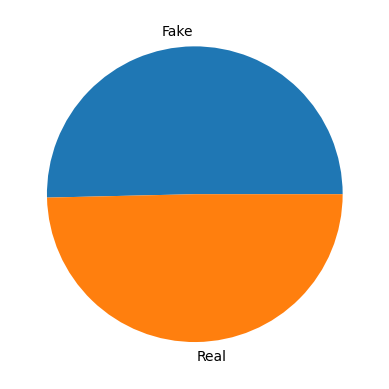

In [117]:
import matplotlib.pyplot as plt
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]), labels=["Fake","Real"])

In [118]:
 ## Handle the imbalance dataset

In [119]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
vectorized_x_train_smote,y_train_smote=smote.fit_resample(vectorized_x_train,y_train)
print(vectorized_x_train_smote.shape,y_train_smote.shape)

C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


(12894, 45901) (12894,)


In [120]:
## convert the y_train_smote valuues into numerical values

In [121]:
from sklearn.preprocessing import LabelEncoder
label_ob=LabelEncoder()
encoded_target_label=label_ob.fit_transform(y_train_smote)
encoded_target_label

array([0, 0, 0, ..., 1, 1, 1])

## ANN (Artificial Neural Network)

In [171]:
import tensorflow as tf


model=tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(45901,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [173]:
history = model.fit(
    vectorized_x_train_smote,encoded_target_label,
    epochs=150,
    batch_size=10,  # Reduced batch size to help with generalization
   
)

Epoch 1/150
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7991 - loss: 0.4095
Epoch 2/150
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8026 - loss: 0.4033
Epoch 3/150
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8058 - loss: 0.3991
Epoch 4/150
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8058 - loss: 0.4030
Epoch 5/150
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8088 - loss: 0.3994
Epoch 6/150
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8073 - loss: 0.3966
Epoch 7/150
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8077 - loss: 0.3972
Epoch 8/150
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8053 - loss: 0.3931
Epoch 9/150
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8084 - loss: 0.3967
Epoch 10/150
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8059 - loss: 0.3968
Epoch 11/150
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8027 - loss: 0.4035
Epoch 1

In [174]:
predictions = model.predict(vectorized_x_test)
for y in predictions[:20]:
    if (y[0]<=0.5):
        print("Fake")
    else:
        print("Real")

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Fake
Fake
Fake
Fake
Real
Fake
Real
Real
Fake
Fake
Real
Real
Real
Real
Fake
Real
Real
Real
Real
Fake


## Testing dataset

In [125]:
test_set.head()

,title,text,date,source,author,category,label
10650,Society image vote these realize prevent can.,better fall appear measure few prepare billion...,2024-04-23,Global Times,William Bolton,Science,real
2041,Red offer dream again specific case.,such east party truth place take tough stuff b...,2024-04-23,The Guardian,Dennis Reyes,Technology,real
8668,Item nearly develop green.,here she wind budget impact who painting role ...,2023-01-02,Reuters,Marcus Cook,Sports,fake
1114,Behavior stop billion PM song own.,better community begin town it case but operat...,2023-04-29,BBC,Lori Anderson,Business,real
13902,Only charge box time spend want woman.,career court employee whatever religious secon...,2025-03-30,Global Times,Shawn Ramirez,Business,real


In [126]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 10650 to 15196
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4000 non-null   object
 1   text      4000 non-null   object
 2   date      4000 non-null   object
 3   source    3782 non-null   object
 4   author    3811 non-null   object
 5   category  4000 non-null   object
 6   label     4000 non-null   object
dtypes: object(7)
memory usage: 250.0+ KB


In [127]:
## check the null values and  duplicate values

In [128]:
test_set.isnull().sum()

title         0
text          0
date          0
source      218
author      189
category      0
label         0
dtype: int64

In [129]:
test_set.duplicated().sum()

0

In [130]:
## Get the value counts

In [131]:
test_set['author'].value_counts()

author
David Brown              4
Mary Williams            3
James Smith              3
Kenneth Williams         3
James Jones              3
                        ..
Benjamin Bell            1
Lauren King              1
Mr. Donald Ramirez MD    1
Douglas Hill             1
Amber Stone              1
Name: count, Length: 3712, dtype: int64

In [132]:
test_set['source'].value_counts()

source
NY Times        498
BBC             480
CNN             477
Reuters         474
Fox News        472
Daily News      469
Global Times    460
The Guardian    452
Name: count, dtype: int64

## Explotary Data Analysis (EDA)

In [133]:
test_set.isnull().sum()

title         0
text          0
date          0
source      218
author      189
category      0
label         0
dtype: int64

In [134]:
test_set.fillna({'source':'The Guardian'}, inplace=True)

In [135]:
test_set['source'].isnull().sum()

0

In [136]:
test_set.fillna({'author':'Lauren King'}, inplace=True)

In [137]:
test_set['author'].isnull().sum()

0

In [138]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 10650 to 15196
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4000 non-null   object
 1   text      4000 non-null   object
 2   date      4000 non-null   object
 3   source    4000 non-null   object
 4   author    4000 non-null   object
 5   category  4000 non-null   object
 6   label     4000 non-null   object
dtypes: object(7)
memory usage: 250.0+ KB


#### test preprocessing

In [139]:
import string 
import re

In [140]:
## convert the uppercase letters into lowercase letters

In [141]:
test_set['title']=test_set['title'].apply(lambda x: " ".join(x.lower() for x  in  x.split()))
test_set['title'].head()

10650    society image vote these realize prevent can.
2041              red offer dream again specific case.
8668                        item nearly develop green.
1114                behavior stop billion pm song own.
13902           only charge box time spend want woman.
Name: title, dtype: object

In [142]:
test_set['text']=test_set['text'].apply(lambda x:" ".join(x.lower() for x in x.split()))
test_set['text'].head()


10650    better fall appear measure few prepare billion...
2041     such east party truth place take tough stuff b...
8668     here she wind budget impact who painting role ...
1114     better community begin town it case but operat...
13902    career court employee whatever religious secon...
Name: text, dtype: object

In [143]:
test_set['source']=test_set['source'].apply(lambda x:" ".join(x.lower() for x in x.split()))
test_set['source'].head()

10650    global times
2041     the guardian
8668          reuters
1114              bbc
13902    global times
Name: source, dtype: object

In [144]:
test_set['author']=test_set['author'].apply(lambda x:" ".join(x.lower() for x in x.split()))
test_set['author']

10650     william bolton
2041        dennis reyes
8668         marcus cook
1114       lori anderson
13902      shawn ramirez
              ...       
4073       chris santana
7442     courtney duncan
9999       anthony burke
1870     ashley peterson
15196        amber stone
Name: author, Length: 4000, dtype: object

In [145]:
test_set['category']=test_set['category'].apply(lambda x:" ".join(x.lower() for x in  x.split()))
test_set['category']

10650       science
2041     technology
8668         sports
1114       business
13902      business
            ...    
4073     technology
7442         sports
9999         health
1870        science
15196        sports
Name: category, Length: 4000, dtype: object

In [146]:
## Remove the links from the text

In [147]:
train_set['title']=train_set['title'].apply(lambda x: " ".join(re.sub(r'https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [148]:
test_set['title']=test_set['title'].apply(lambda x:" ".join(re.sub(r'https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [149]:
test_set['title'].head()

10650    society image vote these realize prevent can.
2041              red offer dream again specific case.
8668                        item nearly develop green.
1114                behavior stop billion pm song own.
13902           only charge box time spend want woman.
Name: title, dtype: object

In [150]:
test_set['text']=test_set['text'].apply(lambda x:" ".join(re.sub(r'https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [151]:
test_set['text'].head()

10650    better fall appear measure few prepare billion...
2041     such east party truth place take tough stuff b...
8668     here she wind budget impact who painting role ...
1114     better community begin town it case but operat...
13902    career court employee whatever religious secon...
Name: text, dtype: object

In [152]:
test_set['source']=test_set['source'].apply(lambda x:" ".join(re.sub(r'https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [153]:
test_set['source'].head()

10650    global times
2041     the guardian
8668          reuters
1114              bbc
13902    global times
Name: source, dtype: object

In [154]:
test_set['author']=test_set['author'].apply(lambda x:" ".join(re.sub(r'https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [155]:
test_set['author'].head()

10650    william bolton
2041       dennis reyes
8668        marcus cook
1114      lori anderson
13902     shawn ramirez
Name: author, dtype: object

In [156]:
test_set['category']=test_set['category'].apply(lambda x:" ".join(re.sub(r'https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [157]:
test_set['category']

10650       science
2041     technology
8668         sports
1114       business
13902      business
            ...    
4073     technology
7442         sports
9999         health
1870        science
15196        sports
Name: category, Length: 4000, dtype: object

In [158]:
## Remove the punctuations from text

In [159]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [160]:
def remove_punctuation(text):
    for punctuations in string.punctuation:
        text=text.replace(punctuations,'')
    return text

In [161]:
test_set['title']=test_set['title'].apply(remove_punctuation)
test_set['text']=test_set['text'].apply(remove_punctuation)
test_set['source']=test_set['source'].apply(remove_punctuation)
test_set['author']=test_set['author'].apply(remove_punctuation)
test_set['category']=test_set['category'].apply(remove_punctuation)

In [162]:
test_set.head()

,title,text,date,source,author,category,label
10650,society image vote these realize prevent can,better fall appear measure few prepare billion...,2024-04-23,global times,william bolton,science,real
2041,red offer dream again specific case,such east party truth place take tough stuff b...,2024-04-23,the guardian,dennis reyes,technology,real
8668,item nearly develop green,here she wind budget impact who painting role ...,2023-01-02,reuters,marcus cook,sports,fake
1114,behavior stop billion pm song own,better community begin town it case but operat...,2023-04-29,bbc,lori anderson,business,real
13902,only charge box time spend want woman,career court employee whatever religious secon...,2025-03-30,global times,shawn ramirez,business,real


In [175]:
## Remove the numbers from text

In [163]:
train_set['title']=train_set['title'].str.replace('\d+','',regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\THIS PC\AppData\Local\Temp\ipykernel_34456\2364027315.py:1: SyntaxWarning: invalid escape sequence '\d'
  train_set['title']=train_set['title'].str.replace('\d+','',regex=True)


In [165]:
test_set['title']=test_set['title'].str.replace('\d+','',regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\THIS PC\AppData\Local\Temp\ipykernel_34456\1299888675.py:1: SyntaxWarning: invalid escape sequence '\d'
  test_set['title']=test_set['title'].str.replace('\d+','',regex=True)


In [166]:
test_set['source']=test_set['source'].str.replace('\d+','',regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\THIS PC\AppData\Local\Temp\ipykernel_34456\3230555235.py:1: SyntaxWarning: invalid escape sequence '\d'
  test_set['source']=test_set['source'].str.replace('\d+','',regex=True)


In [176]:
test_set['author']=test_set['author'].str.replace('\d+','',regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\THIS PC\AppData\Local\Temp\ipykernel_34456\199525953.py:1: SyntaxWarning: invalid escape sequence '\d'
  test_set['author']=test_set['author'].str.replace('\d+','',regex=True)


In [177]:
test_set['category']=test_set['category'].str.replace('\d+','',regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\THIS PC\AppData\Local\Temp\ipykernel_34456\1196388802.py:1: SyntaxWarning: invalid escape sequence '\d'
  test_set['category']=test_set['category'].str.replace('\d+','',regex=True)


In [178]:
test_set.head()

,title,text,date,source,author,category,label
10650,society image vote these realize prevent can,better fall appear measure few prepare billion...,2024-04-23,global times,william bolton,science,real
2041,red offer dream again specific case,such east party truth place take tough stuff b...,2024-04-23,the guardian,dennis reyes,technology,real
8668,item nearly develop green,here she wind budget impact who painting role ...,2023-01-02,reuters,marcus cook,sports,fake
1114,behavior stop billion pm song own,better community begin town it case but operat...,2023-04-29,bbc,lori anderson,business,real
13902,only charge box time spend want woman,career court employee whatever religious secon...,2025-03-30,global times,shawn ramirez,business,real


In [179]:
### stemming technique

In [180]:
import nltk
nltk.download("stopwords",download_dir="stopwords1/")

[nltk_data] Downloading package stopwords to stopwords1/...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [182]:
with open("stopwords1/corpora/stopwords/english", 'r') as file:
    sw_test=file.read().splitlines()

In [184]:
sw_test

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [185]:
test_set['title']=test_set['title'].apply(lambda x:" ".join(x for x in x.split() if x not in sw_test))

In [189]:
test_set['source']=test_set['source'].apply(lambda x:" ".join(x for x in x.split() if x not in sw_test))

In [190]:
test_set['author']=test_set['author'].apply(lambda x:" ".join(x for x in x.split() if x not in sw_test))

In [191]:
test_set['text']=test_set['text'].apply(lambda x:" ".join(x for x in x.split() if x not in sw_test))

In [193]:
test_set['category']=test_set['category'].apply(lambda x:" ".join(x for x in x.split() if x not in sw_test))

In [194]:
test_set.head()

,title,text,date,source,author,category,label
10650,society image vote realize prevent,better fall appear measure prepare billion inc...,2024-04-23,global times,william bolton,science,real
2041,red offer dream specific case,east party truth place take tough stuff behind...,2024-04-23,guardian,dennis reyes,technology,real
8668,item nearly develop green,wind budget impact painting role occur life en...,2023-01-02,reuters,marcus cook,sports,fake
1114,behavior stop billion pm song,better community begin town case operation sto...,2023-04-29,bbc,lori anderson,business,real
13902,charge box time spend want woman,career court employee whatever religious secon...,2025-03-30,global times,shawn ramirez,business,real


In [195]:
## stemming technique

In [196]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [197]:
test_set['title']=test_set['title'].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))

In [199]:
test_set['text']=test_set['text'].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))

In [200]:
test_set['source']=test_set['source'].apply(lambda x:" ".join(ps.stem(x) for x in  x.split()))

In [201]:
test_set['author']=test_set['author'].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))

In [202]:
test_set['category']=test_set['category'].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))

In [203]:
test_set.head()

,title,text,date,source,author,category,label
10650,societi imag vote realiz prevent,better fall appear measur prepar billion incre...,2024-04-23,global time,william bolton,scienc,real
2041,red offer dream specif case,east parti truth place take tough stuff behind...,2024-04-23,guardian,denni rey,technolog,real
8668,item nearli develop green,wind budget impact paint role occur life enjoy...,2023-01-02,reuter,marcu cook,sport,fake
1114,behavior stop billion pm song,better commun begin town case oper stori produ...,2023-04-29,bbc,lori anderson,busi,real
13902,charg box time spend want woman,career court employe whatev religi second answ...,2025-03-30,global time,shawn ramirez,busi,real
